# Fruits Recognition from images Using CNN

## About The Dataset
### Fruits 360 dataset: A dataset of images containing fruits and vegetables

The following fruits and Vegetables are included:
Apples (different varieties: Crimson Snow, Golden, Golden-Red, Granny Smith, Pink Lady, Red, Red Delicious), Apricot, Avocado, Avocado ripe, Banana (Yellow, Red, Lady Finger), Beetroot Red, Blueberry, Cactus fruit, Cantaloupe (2 varieties), Carambula, Cauliflower, Cherry (different varieties, Rainier), Cherry Wax (Yellow, Red, Black), Chestnut, Clementine, Cocos, Corn (with husk), Cucumber (ripened), Dates, Eggplant, Fig, Ginger Root, Granadilla, Grape (Blue, Pink, White (different varieties)), Grapefruit (Pink, White), Guava, Hazelnut, Huckleberry, Kiwi, Kaki, Kohlrabi, Kumsquats, Lemon (normal, Meyer), Lime, Lychee, Mandarine, Mango (Green, Red), Mangostan, Maracuja, Melon Piel de Sapo, Mulberry, Nectarine (Regular, Flat), Nut (Forest, Pecan), Onion (Red, White), Orange, Papaya, Passion fruit, Peach (different varieties), Pepino, Pear (different varieties, Abate, Forelle, Kaiser, Monster, Red, Stone, Williams), Pepper (Red, Green, Orange, Yellow), Physalis (normal, with Husk), Pineapple (normal, Mini), Pitahaya Red, Plum (different varieties), Pomegranate, Pomelo Sweetie, Potato (Red, Sweet, White), Quince, Rambutan, Raspberry, Redcurrant, Salak, Strawberry (normal, Wedge), Tamarillo, Tangelo, Tomato (different varieties, Maroon, Cherry Red, Yellow, not ripened, Heart), Walnut, Watermelon.

### Dataset Properties

Total number of images: 90483.

Training set size: 67692 images (one fruit or vegetable per image).

Test set size: 22688 images (one fruit or vegetable per image).

Multi-fruits set size: 103 images (more than one fruit (or fruit class) per image)

Number of classes: 131 (fruits and vegetables).

Image size: 100x100 pixels.

Filename format: imageindex100.jpg (e.g. 32100.jpg) or rimageindex100.jpg (e.g. r32100.jpg) or r2imageindex100.jpg or r3imageindex100.jpg. "r" stands for rotated fruit. "r2" means that the fruit was rotated around the 3rd axis. "100" comes from image size (100x100 pixels).

Different varieties of the same fruit (apple for instance) are stored as belonging to different classes.

### LICENSE

MIT License

Copyright (c) 2017-2020 Mihai Oltean, Horea Muresan

In [1]:
project_name="fruits-dataset-classification-ccd41"

Project name will be used to commit and save our work on Jovian.Ml platform.

## Uploading Data from Kaggle Dataset

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

After executing the above cell, we will be able to see the data folders in to kaggle data input directory.It can be seen through the side navigation bar under data nav.
## Understanding directory structure of data 

In [4]:
data_dir="../input/fruits/fruits-360"
print('Folders present in the fruits-360 dataset:')
print(os.listdir(data_dir))
print('\n\n')
classes=os.listdir(data_dir+'/Training')
print('Classes present in to the Fruits-360 Training set:',end='\n\n')
print(classes)
print('\n')
print('Total no of classes in the training set :',len(classes))

Folders present in the fruits-360 dataset:
['Test', 'test-multiple_fruits', 'readme.md', 'papers', 'Training', 'LICENSE']



Classes present in to the Fruits-360 Training set:

['Papaya', 'Watermelon', 'Onion White', 'Apple Granny Smith', 'Kiwi', 'Kaki', 'Tomato 4', 'Strawberry', 'Carambula', 'Strawberry Wedge', 'Tomato Maroon', 'Apple Red 1', 'Potato Red Washed', 'Lychee', 'Peach 2', 'Pear Red', 'Plum 2', 'Dates', 'Banana', 'Corn Husk', 'Tomato Cherry Red', 'Huckleberry', 'Avocado', 'Cauliflower', 'Apricot', 'Tomato Heart', 'Potato Sweet', 'Pomegranate', 'Pepper Red', 'Cocos', 'Onion Red', 'Tomato 1', 'Walnut', 'Apple Red 3', 'Potato Red', 'Pear Monster', 'Tomato 3', 'Nut Forest', 'Mango Red', 'Pear', 'Ginger Root', 'Apple Crimson Snow', 'Cherry 1', 'Pear Abate', 'Pepper Yellow', 'Pepper Green', 'Avocado ripe', 'Grapefruit White', 'Apple Golden 3', 'Apple Red Yellow 2', 'Cherry Rainier', 'Hazelnut', 'Apple Braeburn', 'Corn', 'Peach Flat', 'Limes', 'Banana Lady Finger', 'Clementine', '

After the execution of above cell,we are able to conclude that dataset has 131 classes of images of fruits and vegetable and we cab also see the names of the various classes,as we are able to see the glimpse of the diversity of the dataset.
We will explore this more, using the os module of Python.

In [5]:
#Lets just check,How many images are there in each class?
print('{:20}{:>6}'.format('Name of the class','Total images'))
print('\n')
total=0
for classs in classes:
      class_files=os.listdir(data_dir+'/Training/'+classs)
      print('{:<20}{:>6}'.format(classs,len(class_files)))
      total+=len(class_files)
print('\nTotal No. of images in the training dataset :',total)

Name of the class   Total images


Papaya                 492
Watermelon             475
Onion White            438
Apple Granny Smith     492
Kiwi                   466
Kaki                   490
Tomato 4               479
Strawberry             492
Carambula              490
Strawberry Wedge       738
Tomato Maroon          367
Apple Red 1            492
Potato Red Washed      453
Lychee                 490
Peach 2                738
Pear Red               666
Plum 2                 420
Dates                  490
Banana                 490
Corn Husk              462
Tomato Cherry Red      492
Huckleberry            490
Avocado                427
Cauliflower            702
Apricot                492
Tomato Heart           684
Potato Sweet           450
Pomegranate            492
Pepper Red             666
Cocos                  490
Onion Red              450
Tomato 1               738
Walnut                 735
Apple Red 3            429
Potato Red             450
Pear Monster        


Now, we are able to adapt important facts about the data that is length of training data set,No of images in each class and total no. of classes
since we are predicting the fruit and vegetable in the image using Pytorch so we cannot work through directory structure.To explore more about the dataset, we need to convert it into tensors.
## Importing libraries

In [6]:
#import various libraries
import os
import torch
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import random_split
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now,we will convert the dataset into tensors using the above imported libraries.

In [7]:
dataset=ImageFolder(data_dir+'/Training',transform=ToTensor())

The variable dataset contains the whole training dataset of approx 67,000 images.Now we will explore some more features of the dataset.

## Explore and Visulaization of Images

In [8]:
img,label=dataset[0]
print(img.shape,label)
img

torch.Size([3, 100, 100]) 0


tensor([[[0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [9]:
img,label=dataset[1321]
print(img.shape,label)

torch.Size([3, 100, 100]) 2


In [10]:
img,label=dataset[50000]
print(img.shape,label)

torch.Size([3, 100, 100]) 97


so ,we had explores through some of the images of training dataset ,we can see that now the image is transformed to tensor and the when we take the output of img.shape, we see the shape as [3,100,100] i.e. each image has three channel R,G,B and each channel has a 100X100 matrix so we can conclude that each image is a coloured image having 100X100X3=30000 values for each.
The label we get as a output is an integer, integer denotes the index of respective class in the list of classes.We can get the list of classes using .classes method as follows:

In [11]:
classes=dataset.classes
for class_ in classes:
    print(class_)

Apple Braeburn
Apple Crimson Snow
Apple Golden 1
Apple Golden 2
Apple Golden 3
Apple Granny Smith
Apple Pink Lady
Apple Red 1
Apple Red 2
Apple Red 3
Apple Red Delicious
Apple Red Yellow 1
Apple Red Yellow 2
Apricot
Avocado
Avocado ripe
Banana
Banana Lady Finger
Banana Red
Beetroot
Blueberry
Cactus fruit
Cantaloupe 1
Cantaloupe 2
Carambula
Cauliflower
Cherry 1
Cherry 2
Cherry Rainier
Cherry Wax Black
Cherry Wax Red
Cherry Wax Yellow
Chestnut
Clementine
Cocos
Corn
Corn Husk
Cucumber Ripe
Cucumber Ripe 2
Dates
Eggplant
Fig
Ginger Root
Granadilla
Grape Blue
Grape Pink
Grape White
Grape White 2
Grape White 3
Grape White 4
Grapefruit Pink
Grapefruit White
Guava
Hazelnut
Huckleberry
Kaki
Kiwi
Kohlrabi
Kumquats
Lemon
Lemon Meyer
Limes
Lychee
Mandarine
Mango
Mango Red
Mangostan
Maracuja
Melon Piel de Sapo
Mulberry
Nectarine
Nectarine Flat
Nut Forest
Nut Pecan
Onion Red
Onion Red Peeled
Onion White
Orange
Papaya
Passion Fruit
Peach
Peach 2
Peach Flat
Pear
Pear 2
Pear Abate
Pear Forelle
Pear Kai

Lets just start the visulaization part ans see how the images really look like, to make it simple we will just define a simple function to which we just need to pass the image to be shown

Label: Apple Braeburn


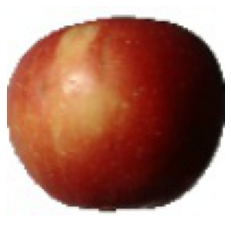

In [12]:
def show_image(image):
    img,label=image
    print('Label:',classes[label])
    plt.imshow(img.permute(1,2,0))
    plt.axis('off')
show_image(dataset[0])

Label: Passion Fruit


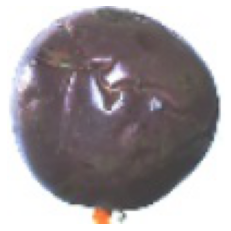

In [13]:
show_image(dataset[40000])

## Training and Validation Datasets

While building real world machine learning models, it is quite common to split the dataset into 3 parts:

    Training set - used to train the model i.e. compute the loss and adjust the weights of the model using gradient descent.
    Validation set - used to evaluate the model while training, adjust hyperparameters (learning rate etc.) and pick the best version of the model.
    Test set - used to compare different models, or different types of modeling approaches, and report the final accuracy of the model.

Since there's no predefined validation set, we can set aside a small portion (6500 images) of the training set to be used as the validation set. We'll use the random_split helper method from PyTorch to do this. To ensure that we always create the same validation set, we'll also set a seed for the random number generator.


In [14]:
torch.manual_seed(42) #Mannual seed is for fixing the output of the random function for each run.
val_size=6500
train_size=len(dataset)-val_size

train_ds,val_ds=random_split(dataset,[train_size,val_size])
print('Training dataset size:',len(train_ds))
print('Validation Datset size:',len(val_ds))

Training dataset size: 61192
Validation Datset size: 6500


We can now create dataloaders for training and validation to load the data into batches.

In [16]:
batch_size=136
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

Batches are required as dataset is large as it might slow up the speed of the model by giving it all the data at once.
We can look at batches of images from the dataset using the make_grid method from torchvision. Each time the following code is run, we get a different bach, since the sampler shuffles the indices before creating batches.


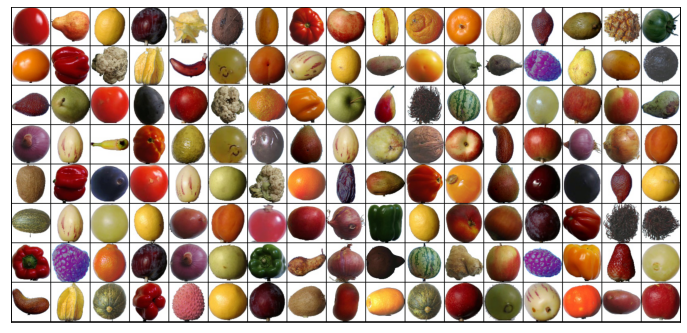

In [17]:
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=17).permute(1, 2, 0))
        break
show_batch(train_dl)

## Model(Convolutional Neural Networks)
We will train the model using Convolutional neural network(CNN).We will use [nn.Conv2d] class from [Pytorch].
The 2D convolution is a fairly simple operation at heart: you start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. 
For multi-channel images, a different kernel is applied to each channels, and the outputs are added together pixel-wise.

There are certain advantages offered by convolutional layers when working with image data:

**Fewer parameters**: A small set of parameters (the kernel) is used to calculate outputs of the entire image, so the model has much fewer parameters compared to a fully connected layer.

**Sparsity of connections**: In each layer, each output element only depends on a small number of input elements, which makes the forward and backward passes more efficient.
   
**Parameter sharing and spatial invariance:** The features learned by a kernel in one part of the image can be used to detect similar pattern in a different part of another image.



In [18]:
import torch.nn as nn
import torch.nn.functional as F


In [19]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

We'll use nn.Sequential to chain the layers and activations functions into a single network architecture.I will be using a 5 layer convolutional neural network for this dataset.

In [21]:
class fruit360CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            #nn.MaxPool2d(2,2),#ouput:16 x 50 x 50
            
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 50 x 50

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            #nn.MaxPool2d(2, 2),
            
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 25 x 25
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            #nn.MaxPool2d(2, 2),
            
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(5,5), # output: 256 x 5 x 5

            nn.Flatten(), 
            nn.Linear(256*5*5, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 131))
        
    def forward(self, xb):
        return self.network(xb)

We have defined the model class succsesfully now,further we are going to create a object to this class using which we will proceed the training or verify the the training of the model.

In [22]:
model=fruit360CnnModel()
model

fruit360CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=5, stride=5, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten()
    (16): Linear(in_features=6400, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, out_features=

Let's verify that the model produces the expected output on a batch of training data. The 10 outputs for each image can be interpreted as probabilities for the 10 target classes (after applying softmax), and the class with the highest probability is chosen as the label predicted by the model for the input image.

In [23]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([136, 3, 100, 100])
out.shape: torch.Size([136, 131])
out[0]: tensor([-2.0548e-05, -4.3989e-02, -2.0176e-02,  4.3197e-02,  1.5312e-02,
        -3.5998e-02,  2.3623e-02, -6.3709e-03,  5.8823e-03,  3.9819e-02,
         4.3416e-02, -2.1719e-02,  2.2473e-03, -2.4311e-02,  3.5460e-02,
         2.6176e-02,  1.1288e-02, -4.0046e-02, -3.1601e-03, -4.5387e-02,
        -4.1214e-02, -4.3575e-02,  1.6191e-02, -1.6081e-02,  4.4638e-02,
        -1.9821e-02, -1.0805e-02,  2.1546e-03,  4.1128e-02, -2.1268e-02,
         8.6272e-03, -1.2723e-02,  1.2686e-02, -1.8338e-02, -4.2621e-02,
         5.0292e-03,  9.1170e-03,  3.7476e-02, -4.4035e-02,  6.1146e-03,
        -5.0986e-02, -1.5802e-02,  2.3913e-02, -2.9731e-02,  1.1690e-02,
        -1.8144e-03, -2.8088e-03,  2.0785e-02, -5.6932e-02,  2.1212e-02,
        -3.5033e-02,  2.8462e-02,  2.4879e-02,  1.0996e-02,  4.4395e-02,
         9.5901e-03, -1.8197e-02, -9.2488e-03, -2.5601e-02, -4.9307e-03,
        -4.6335e-03, -1.1637e-02, -3.

NOw,from here we will define the function to use another device i.e. GPU.GPU help in speeding up the process of modelling as CPU may take longer time than GPU.Here,we will define some functions which are helping us in function with GPU.

In [24]:
import torch
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Above code can help us whether we are using CPU or GPU.so first we will check above the device i.e. we have a GPU or not..and then we will load our data onto the device using above defined functions.

In [25]:
device = get_default_device()
device

device(type='cuda')

In [28]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

in the above,to_device is used to tranfer the model onto the device GPU and DeviceDataLoader function is used to load the data to the device.

## Training the model
We will define the fit and evaluate function for training the model here.

In [29]:
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

Now,here,before starting the training of the model over training dataset, we will first check it over the validation dataset by instantiating our model again here.

In [30]:
model=to_device(fruit360CnnModel(),device)
evaluate(model,val_dl)

{'val_loss': 4.8751020431518555, 'val_acc': 0.00786523800343275}

In [31]:
num_epochs = 8
opt_func = torch.optim.Adam
lr = 0.001
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.7732, val_loss: 0.2257, val_acc: 0.9227
Epoch [1], train_loss: 0.1279, val_loss: 0.0590, val_acc: 0.9804
Epoch [2], train_loss: 0.0509, val_loss: 0.0927, val_acc: 0.9705
Epoch [3], train_loss: 0.0416, val_loss: 0.0784, val_acc: 0.9778
Epoch [5], train_loss: 0.0301, val_loss: 0.0099, val_acc: 0.9968
Epoch [6], train_loss: 0.0166, val_loss: 0.0559, val_acc: 0.9880
Epoch [7], train_loss: 0.0262, val_loss: 0.0108, val_acc: 0.9974


In [32]:
!pip install jovian --upgrade -q

In [33]:
import jovian

<IPython.core.display.Javascript object>

It's important to record the hyperparameters of every experiment you do, to replicate it later and compare it against other experiments. We can record them using jovian.log_hyperparams.

In [34]:
jovian.reset()
jovian.log_hyperparams({
    'num_epochs': num_epochs,
    'opt_func': opt_func.__name__,
    'batch_size': batch_size,
    'lr': lr,
})

[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Hyperparams logged.


Just as we have recorded the hyperparameters, we can also record the final metrics achieved by the model using jovian.log_metrics for reference, analysis and compariso

In [35]:
jovian.log_metrics(train_loss=history[-1]['train_loss'], 
                   val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'])

[jovian] Metrics logged.


NOw ,we will visualize how the model get improved overtime and and speed of the accuracy by which it is being better.

In [36]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

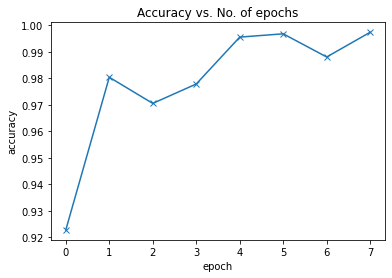

In [37]:
plot_accuracies(history)

Our model reaches to the accuracy of [approx 99%] which is very good result in just epochs.further we have test our data over test data set.
We can also visualize the training and validation loss to see the trade off.

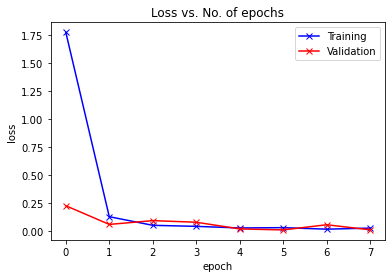

In [38]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

We can see that after the small time of training the training loss and the validation loss almost becomes equal.Now we will move forward to test our model against the test dataset.

## Testing the dataset
Lets just access to test directory of the dataset and tranform the dataset similarly as we did with the training dataset.

In [39]:
test_dataset = ImageFolder(data_dir+'/Test', transform=ToTensor())

Lets just analyse the Test data as we did with the training dataset previously.

In [41]:
classes=os.listdir(data_dir+'/Test')
print('Classes present in to the Fruits-360 Test set:',end='\n\n')
print(classes)
print('\n')
print('Total no of classes in the test set :',len(classes))

Classes present in to the Fruits-360 Test set:

['Papaya', 'Watermelon', 'Onion White', 'Apple Granny Smith', 'Kiwi', 'Kaki', 'Tomato 4', 'Strawberry', 'Carambula', 'Strawberry Wedge', 'Tomato Maroon', 'Apple Red 1', 'Potato Red Washed', 'Lychee', 'Peach 2', 'Pear Red', 'Plum 2', 'Dates', 'Banana', 'Corn Husk', 'Tomato Cherry Red', 'Huckleberry', 'Avocado', 'Cauliflower', 'Apricot', 'Tomato Heart', 'Potato Sweet', 'Pomegranate', 'Pepper Red', 'Cocos', 'Onion Red', 'Tomato 1', 'Walnut', 'Apple Red 3', 'Potato Red', 'Pear Monster', 'Tomato 3', 'Nut Forest', 'Mango Red', 'Pear', 'Ginger Root', 'Apple Crimson Snow', 'Cherry 1', 'Pear Abate', 'Pepper Yellow', 'Pepper Green', 'Avocado ripe', 'Grapefruit White', 'Apple Golden 3', 'Apple Red Yellow 2', 'Cherry Rainier', 'Hazelnut', 'Apple Braeburn', 'Corn', 'Peach Flat', 'Limes', 'Banana Lady Finger', 'Clementine', 'Apple Golden 1', 'Cherry 2', 'Pineapple Mini', 'Tomato not Ripened', 'Grape White 2', 'Rambutan', 'Lemon', 'Pepino', 'Lemon Meyer

In [42]:
print('{:20}{:>6}'.format('Name of the class','Total images'))
print('\n')
total=0
for classs in classes:
      class_files=os.listdir(data_dir+'/Test/'+classs)
      print('{:<20}{:>6}'.format(classs,len(class_files)))
      total+=len(class_files)
print('\nTotal No. of images in the test dataset :',total)

Name of the class   Total images


Papaya                 164
Watermelon             157
Onion White            146
Apple Granny Smith     164
Kiwi                   156
Kaki                   166
Tomato 4               160
Strawberry             164
Carambula              166
Strawberry Wedge       246
Tomato Maroon          127
Apple Red 1            164
Potato Red Washed      151
Lychee                 166
Peach 2                246
Pear Red               222
Plum 2                 142
Dates                  166
Banana                 166
Corn Husk              154
Tomato Cherry Red      164
Huckleberry            166
Avocado                143
Cauliflower            234
Apricot                164
Tomato Heart           228
Potato Sweet           150
Pomegranate            164
Pepper Red             222
Cocos                  166
Onion Red              150
Tomato 1               246
Walnut                 249
Apple Red 3            144
Potato Red             150
Pear Monster        

Let's define a helper function predict_image, which returns the predicted label for a single image tensor.

In [43]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: Tomato Yellow , Predicted: Tomato Yellow


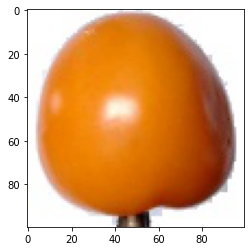

In [44]:
img, label = test_dataset[22000]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: Apple Pink Lady , Predicted: Apple Pink Lady


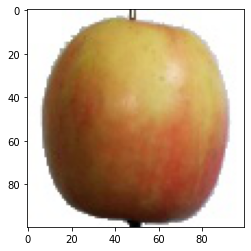

In [45]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

As a final step, let's also look at the overall loss and accuracy of the model on the test set, and record using jovian. We expect these values to be similar to those for the validation set. If not, we might need a better validation set that has similar data and distribution as the test set (which often comes from real world data).

In [46]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.4521232545375824, 'val_acc': 0.9122461676597595}

In [48]:
jovian.log_metrics(test_loss=result['val_loss'], test_acc=result['val_acc'])

[jovian] Metrics logged.


Since we've trained our model for a long time and achieved a resonable accuracy, it would be a good idea to save the weights of the model to disk, so that we can reuse the model later and avoid retraining from scratch. Here's how you can save the model.


In [48]:
torch.save(model.state_dict(), 'fruit360-cnn.pth')

The .state_dict method returns an OrderedDict containing all the weights and bias matrices mapped to the right attributes of the model. To load the model weights, we can redefine the model with the same structure, and use the .load_state_dict method.



In [49]:
model2 = to_device(fruit360CnnModel(), device)

model2.load_state_dict(torch.load('fruit360-cnn.pth'))



<All keys matched successfully>

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [53]:
evaluate(model2, test_loader)

{'val_loss': 0.4521232545375824, 'val_acc': 0.9122461676597595}

In [50]:
!pip install jovian --upgrade -q

In [51]:
import jovian

In [58]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/monisinghal30/fruits-dataset-classification-ccd41


<IPython.core.display.Javascript object>